<a href="https://colab.research.google.com/github/n28neeraj/BSE_2nd_Seesion_Tutorial/blob/main/PCA_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Principal Component Analysis**

In [ ]:
# Load Packages
import pandas as pd
#https://pandas.pydata.org/docs/reference/index.html
 
import numpy as np
#https://numpy.org/doc/stable/user/tutorials_index.html

import matplotlib.pyplot as plt
#https://matplotlib.org/tutorials/index.html

from sklearn.decomposition import PCA
#https://scikit-learn.org/stable/user_guide.html

pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
np.set_printoptions(suppress=True)
%matplotlib inline

#MNIST dataset

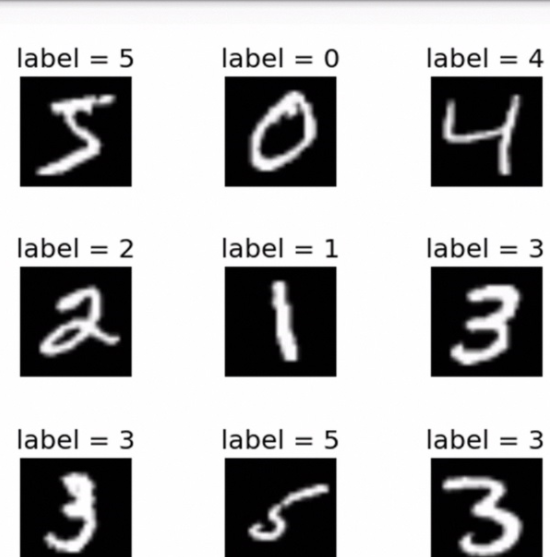

#Import Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mnist_012.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 18.8 MB
None


In [ ]:
print(df.shape)
df.head()

(3147, 785)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,125,171,255,255,150,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,253,253,253,218,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,213,142,176,253,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,250,253,210,32,12,0,6,206,253,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,251,210,25,0,0,0,122,248,253,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,18,0,0,0,0,209,253,253,65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,248,253,253,43,20,20,20,20,5,0,5,20,20,37,150,150,150,147,10,0,0,0,0,0,0,0,0,0,248,253,253,253,253,253,253,253,168,143,166,253,253,253,253,253,253,253,123,0,0,0,0,0,0,0,0,0,174,253,253,253,253,253,253,253,253,253,253,253,249,247,247,169,117,117,57,0,0,0,0,0,0,0,0,0,0,118,123,123,123,166,253,253,253,155,123,123,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,254,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,252,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,244,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,254,63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,228,254,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,251,254,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,254,205,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,215,254,121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,198,176,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# Prepare X and Y
Y = df.loc[:, '0']
X = df.drop(['0'], axis=1)

#PCA

In [ ]:
pca = PCA()
df_pca = pca.fit_transform(X=X)

In [ ]:
# Store as dataframe and print
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)  #> (3147, 784)
df_pca.round(2).head()

(3147, 784)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,-134.27,107.74,-544.92,313.08,-500.13,163.35,-223.05,-460.86,1016.40,206.77,491.66,26.38,475.06,-586.81,-212.62,130.30,-142.28,135.03,33.64,-9.19,-82.92,-162.51,139.57,-87.99,76.97,21.82,208.86,-28.25,-280.18,-128.39,-165.00,-149.95,-162.30,-89.39,124.01,281.61,96.67,-102.44,-133.79,-7.60,119.26,-25.08,15.52,-174.93,153.99,16.98,11.85,129.30,-14.18,130.51,170.69,45.36,-91.76,-225.60,-10.28,-21.01,134.32,-31.34,91.50,-97.61,56.10,-46.42,-80.78,-149.49,-84.85,186.82,-31.06,36.32,-100.05,-22.07,-70.27,-94.31,-1.80,-6.00,-16.89,25.20,28.99,16.84,-95.25,1.15,57.27,3.04,111.24,76.47,29.08,75.36,-21.68,-39.90,-10.37,-53.74,-92.11,-16.60,-89.18,42.78,38.66,14.42,-71.91,-37.66,-66.61,15.07,109.00,20.93,1.18,-11.74,-44.00,0.42,-3.89,-86.59,-34.10,53.78,11.05,2.54,6.93,20.61,-26.47,-45.57,39.03,-32.92,-24.95,-11.43,9.84,-121.58,-85.72,-4.34,27.30,-33.65,-6.02,55.73,-16.54,-88.85,65.16,6.79,-28.36,83.96,3.64,42.36,-41.26,-14.33,-60.87,41.47,-21.57,22.31,17.74,-39.12,73.35,52.74,-26.70,19.30,69.97,18.67,-44.62,-17.22,-44.74,83.49,13.46,29.02,46.37,-9.88,22.12,-68.60,2.36,-9.93,47.68,35.38,14.88,2.68,10.23,16.05,-19.36,39.47,-20.69,3.40,15.03,61.50,-15.45,-36.60,78.00,5.75,-8.78,-10.53,2.26,-30.46,8.98,-27.61,26.29,11.27,46.30,-38.94,-18.27,9.74,-8.61,-22.06,-7.27,-18.08,18.68,-3.05,-11.94,-42.67,40.13,-24.26,-6.23,13.14,-26.45,-3.33,-52.66,30.70,-19.22,19.74,-59.81,14.53,10.17,61.87,61.90,-4.27,29.68,-48.85,-41.14,-2.33,-10.93,2.78,13.00,11.83,-35.17,37.06,4.02,-12.84,19.66,6.34,91.56,68.09,-20.34,21.09,-40.90,-65.29,-14.42,-1.61,35.94,54.49,20.19,0.73,-15.27,-0.03,-24.55,36.10,27.76,17.27,-16.36,-9.94,7.00,48.41,...,0.17,0.27,0.29,-0.15,-0.29,0.02,0.84,-0.20,0.17,-0.50,-0.05,-0.05,-0.08,0.03,0.01,0.01,0.06,-0.0,0.0,0.02,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0

#Eigenvectors

In [ ]:
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,-1.789862e-19,-8.326673e-17,-2.220446e-16,-0.000000e+00,-0.000000e+00,3.469447e-18,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.0,-0.0,-0.000000e+00,-0.000000e+00,-0.0,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000003,-0.000020,-0.000014,-0.000020,-0.000012,-0.0,-0.0,-0.0,-0.0,-0.000004,-0.000006,-0.000003,-1.713529e-07,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000067,-0.000137,-0.000113,-0.000067,-0.000030,-0.000116,-0.000203,-0.000257,-0.000068,-0.000056,0.000084,0.000083,-0.000023,-5.052015e-05,0.000017,0.000024,0.000008,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000041,-0.000204,-0.000376,-0.000586,-0.000812,-0.000954,-0.001006,-0.000769,0.000355,0.001899,0.002954,0.003753,0.003076,0.002355,0.001344,0.000638,0.000306,0.000323,0.000160,0.000035,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.300415e-05,0.000041,-0.000033,-0.000288,-0.000894,-0.001166,-0.000567,0.001086,0.002939,0.006420,0.009710,0.010543,0.015770,0.018512,0.015585,0.012526,0.009144,0.004377,0.001887,0.000526,0.000349,0.000103,7.458552e-07,-0.0,-0.0,-0.0,-0.0,-0.0,0.000006,0.000025,-0.000121,-0.000515,-0.001114,-0.001387,0.001821,0.008155,0.016909,0.025818,0.029655,0.028803,0.028396,0.032784,0.035357,0.035146,0.027718,0.018911,0.009448,0.004037,0.001126,0.000409,0.000102,-0.0,-0.0,-0.0,-0.0,-0.0,7.578415e-07,-0.000085,-0.000330,-0.000659,-0.000106,0.002869,0.011087,0.023852,0.039554,0.050827,0.050691,0.042396,0.035919,0.037363,0.044536,0.052480,0.051069,0.041651,0.026247,0.012314,0.003423,0.000855,0.000146,-0.0,-0.0,-0.0,-0.0,-0.0,0.000036,-0.000200,-0.000320,0.000112,0.002960,0.010497,0.024536,0.043352,0.062395,0.068632,0.059171,0.039951,0.025122,0.025113,0.037252,0.056250,0.067656,0.063726,0.047216,0.024991,0.008105,0.001237,0.000049,-0.0,-0.0,-0.0,-0.0,-0.0,0.000029,0.000248,0.000374,0.001530,0.009073,0.021827,0.040484,0.063038,0.078180,0.078016,0.056667,0.021836,-0.002140,-0.002268,

In [ ]:
print(pca.components_.shape)

(784, 784)


#Move the data to the center of the coordinate system

In [ ]:
X_mean = X - X.mean()
X_mean.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,...,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,0.0,0.0,-0.034954,-0.053702,-0.015888,-0.000636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.117572,-0.25421,-0.19606,-0.173181,-0.360979,-0.879568,-1.346679,-1.674611,-1.550048,-1.456308,-1.339689,-1.172545,-0.553861,-0.297744,-0.224658,-0.131554,-0.020337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.061646,-0.440737,-1.047029,-2.095329,-3.954878,109.044805,115.193835,158.086114,239.774071,239.025421,134.519542,80.118843,-10.028916,-6.854782,-4.019066,-1.911662,-0.545281,-0.379409,-0.159517,-0.036861,0.0,0.0,0.0,0.0,0.0,0.0,-0.017795,-0.023197,-0.187162,-1.671433,-4.080394,-7.781061,154.673975,229.807118,218.8551,205.421036,190.773753,177.050524,172.531935,143.30537,-32.341277,-45.741023,-30.305688,-17.427709,-8.24436,-3.363521,-1.044487,-0.283127,-0.004449,0.0,0.0,0.0,0.0,0.0,-0.021608,-0.106768,-0.698761,-3.821099,-8.653003,152.974897,225.944391,211.210041,192.441055,130.048935,34.497299,47.702256,115.519542,120.224976,3.15761,-94.077534,-66.567842,-40.895138,-19.974579,-8.714331,-2.362568,-0.486495,-0.103273,0.0,0.0,0.0,0.0,0.0,-0.064824,-0.721322,-2.072132,-6.504608,38.298697,226.360661,215.040356,154.275183,-45.353352,-88.132825,-124.031141,-140.183985,49.64061,99.280902,-3.351446,-122.743248,-92.345726,-61.303146,-33.001271,-14.597394,-3.966317,-0.738163,-0.155386,0.0,0.0,0.0,0.0,0.0,-0.127423,-1.191293,-3.841436,-8.995551,59.543375,221.517,164.747061,-38.353352,-82.591992,-98.814109,-117.996187,-15.558945,99.790594,104.961233,-77.00286,-128.742294,-105.500794,-73.74293,-45.122021,-21.734668,-6.938354,-1.011439,-0.104226,0.0,0.0,0.0,0.0,0.0,-0.298697,-1.647919,-4.240864,-9.435653,-19.3238,-2.621544,-31.535748,-66.619002,-79.525898,-90.232602,-104.804576,86.86368,121.530982,121.613918,-64.642517,-121.334287,-106.549094,-81.308548,-53.358754,-29.881157,-11.337782,-2.044487,-0.095964,...,-0.143311,-2.636161,-15.320305,-41.015253,-68.332698,-90.435971,144.

In [ ]:
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[1, :]) 

-970.4151204670745

#Percentage of Variance

In [ ]:
print(pca.explained_variance_ratio_.round(2)[:10])
#> [0.22 0.1  0.06 0.06 0.04 0.04 0.03 0.03 0.02 0.02]

[0.22 0.1  0.06 0.06 0.04 0.04 0.03 0.03 0.02 0.02]


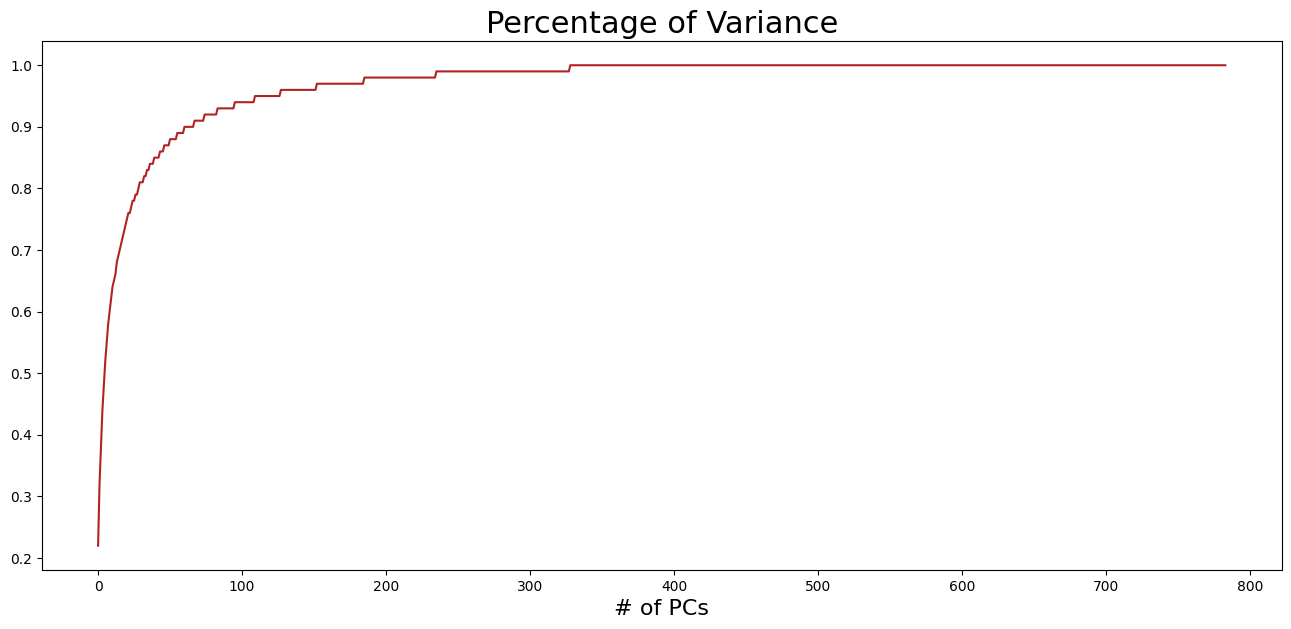

In [ ]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Percentage of Variance', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

#Scatterplot against the first two principal components

In [ ]:
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

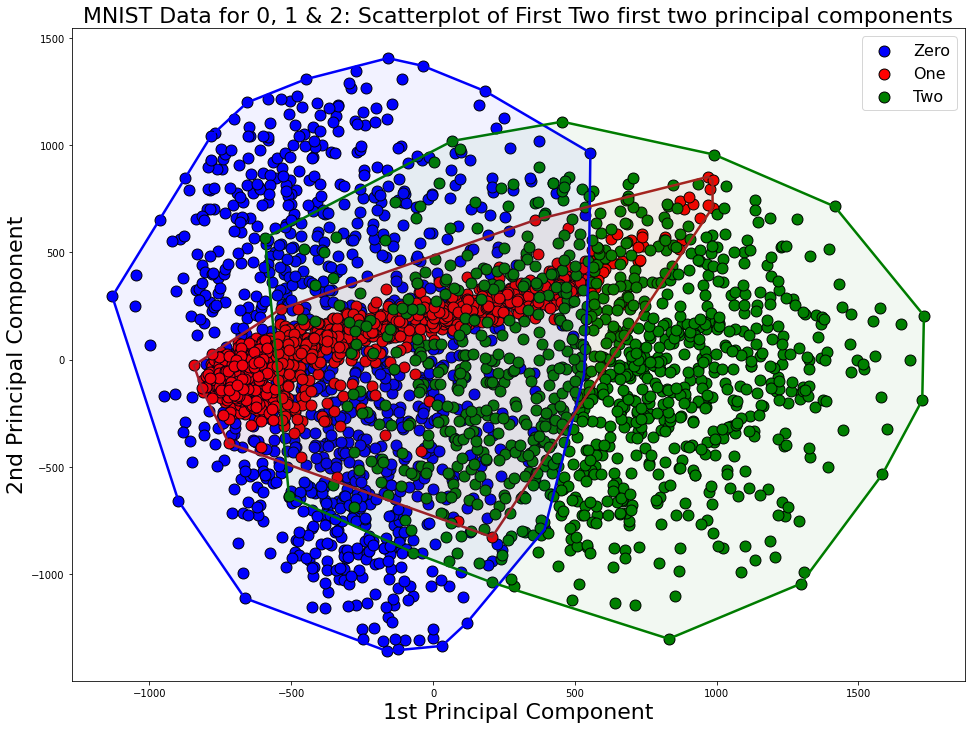

In [ ]:
# Scatterplot against PC1 and PC2
fig, ax = plt.subplots(1,1, figsize=(16,12))

# Row masks for each category
rows_0 = Y==0;
rows_1 = Y==1; 
rows_2 = Y==2; 

# Plot
ax.scatter(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], c='red', edgecolor='k', s=120, label='One')
ax.scatter(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], c='green', edgecolor='k', s=120, label='Two')

# Encircle the boundaries
encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="blue", fc="none", linewidth=2.5)
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="firebrick", fc="none", linewidth=2.5)
encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="green", fc="none", linewidth=2.5)

# Shading
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="k", fc="firebrick", alpha=0.05)
encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="k", fc="blue", alpha=0.05)
encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="k", fc="green", alpha=0.05)

# Labels
ax.set_title("MNIST Data for 0, 1 & 2: Scatterplot of First Two first two principal components", fontsize=22)
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='best', fontsize=16)
plt.show();

#To get the original data back

In [ ]:
df_orig = pca.inverse_transform(df_pca)
pd.DataFrame(df_orig).round().head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,116.0,125.0,171.0,255.0,255.0,150.0,93.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,169.0,253.0,253.0,253.0,253.0,253.0,253.0,218.0,30.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,169.0,253.0,253.0,253.0,213.0,142.0,176.0,253.0,253.0,122.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,52.0,250.0,253.0,210.0,32.0,12.0,-0.0,6.0,206.0,253.0,140.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,77.0,251.0,210.0,25.0,-0.0,-0.0,-0.0,122.0,248.0,253.0,65.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,31.0,18.0,-0.0,-0.0,-0.0,-0.0,209.0,253.0,253.0,65.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,248.0,253.0,253.0,43.0,20.0,20.0,20.0,20.0,5.0,-0.0,5.0,20.0,20.0,37.0,150.0,150.0,150.0,147.0,10.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,168.0,143.0,166.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,123.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,174.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,249.0,247.0,247.0,169.0,117.0,117.0,57.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,118.0,123.0,123.0,123.0,166.0,253.0,253.0,253.0,155.0,123.0,123.0,41.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,